In [0]:
df=spark.read.csv('/FileStore/tables/Mall_Customers-2.csv',header=True)

In [0]:
df=spark.read.csv('/FileStore/tables/Mall_Customers-2.csv',header=True)

In [0]:
df=df.toPandas()
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [0]:
df.isnull().sum()

Out[100]: CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [0]:
X=df.iloc[:,3:5].values
X

Out[101]: array([['15', '39'],
       ['15', '81'],
       ['16', '6'],
       ['16', '77'],
       ['17', '40'],
       ['17', '76'],
       ['18', '6'],
       ['18', '94'],
       ['19', '3'],
       ['19', '72'],
       ['19', '14'],
       ['19', '99'],
       ['20', '15'],
       ['20', '77'],
       ['20', '13'],
       ['20', '79'],
       ['21', '35'],
       ['21', '66'],
       ['23', '29'],
       ['23', '98'],
       ['24', '35'],
       ['24', '73'],
       ['25', '5'],
       ['25', '73'],
       ['28', '14'],
       ['28', '82'],
       ['28', '32'],
       ['28', '61'],
       ['29', '31'],
       ['29', '87'],
       ['30', '4'],
       ['30', '73'],
       ['33', '4'],
       ['33', '92'],
       ['33', '14'],
       ['33', '81'],
       ['34', '17'],
       ['34', '73'],
       ['37', '26'],
       ['37', '75'],
       ['38', '35'],
       ['38', '92'],
       ['39', '36'],
       ['39', '61'],
       ['39', '28'],
       ['39', '65'],
       ['40', '55'],
       ['

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X=sc.fit_transform(X)

In [0]:
# from sklearn.cluster import KMeans
# model=KMeans(n_clusters=3,init='k-means++',random_state=0)
# model.fit(X)
# model.inertia_

In [0]:
#OR

from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    model=KMeans(n_clusters=i,init='k-means++',random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

In [0]:
wcss

Out[105]: [400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015,
 44.91118554999014,
 37.181757826821325,
 32.375253681582876,
 29.076176851244277]

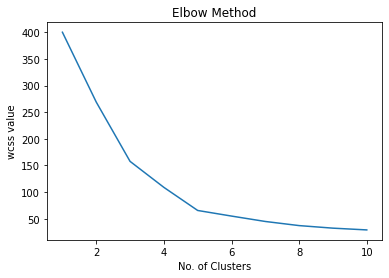

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss value')
plt.show()

In [0]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,init='k-means++',random_state=0)
model.fit(X)

Out[107]: KMeans(n_clusters=5, random_state=0)

In [0]:
y_pred=model.predict(X)
y_pred

Out[108]: array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

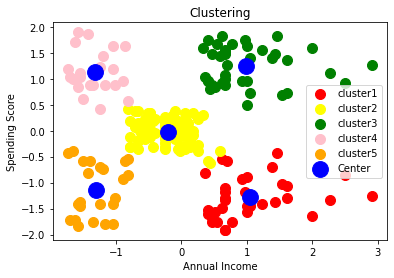

In [0]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='yellow',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='green',label='cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='pink',label='cluster4')
plt.scatter(X[y_pred==4,0],X[y_pred==4,1],s=100,c='orange',label='cluster5')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=250,c='blue',label='Center')
plt.title('Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

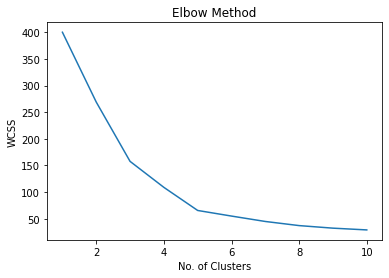

Silhouette score for 2 clusters: 0.29512063001659344
Silhouette score for 3 clusters: 0.46658474419000145
Silhouette score for 4 clusters: 0.4939069237513199
Silhouette score for 5 clusters: 0.5546571631111091
Silhouette score for 6 clusters: 0.5398800926790663
Silhouette score for 7 clusters: 0.5263454490712252
Silhouette score for 8 clusters: 0.45620041477955225
Silhouette score for 9 clusters: 0.45532159949822093
Silhouette score for 10 clusters: 0.44942277625588267


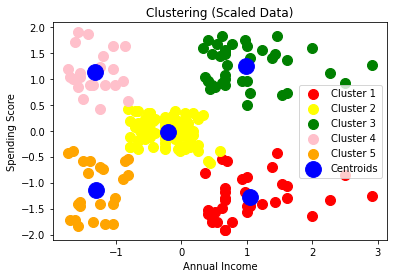

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Read the data
df = spark.read.csv('/FileStore/tables/Mall_Customers-2.csv', header=True)
df = df.toPandas()

# Selecting the right columns (check column positions)
X = df.iloc[:, 3:5].values

# Normalize/Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal clusters
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=0)
    model.fit(X_scaled)
    wcss.append(model.inertia_)

# Plotting Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

# Check silhouette score for different clusters
for i in range(2, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=0)
    model.fit(X_scaled)
    score = silhouette_score(X_scaled, model.labels_)
    print(f"Silhouette score for {i} clusters: {score}")

# Final clustering model (e.g., using 5 clusters based on elbow/silhouette score)
model = KMeans(n_clusters=5, init='k-means++', n_init=100, random_state=0)
model.fit(X_scaled)

# Predict the cluster for each sample
y_pred = model.predict(X_scaled)

# Plot the clusters
plt.scatter(X_scaled[y_pred == 0, 0], X_scaled[y_pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_pred == 1, 0], X_scaled[y_pred == 1, 1], s=100, c='yellow', label='Cluster 2')
plt.scatter(X_scaled[y_pred == 2, 0], X_scaled[y_pred == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_pred == 3, 0], X_scaled[y_pred == 3, 1], s=100, c='pink', label='Cluster 4')
plt.scatter(X_scaled[y_pred == 4, 0], X_scaled[y_pred == 4, 1], s=100, c='orange', label='Cluster 5')

# Plotting cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, c='blue', label='Centroids')
plt.title('Clustering (Scaled Data)')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()
